# Intro

This analysis is a continuation of my previous work; [Analysis Part 01](https://www.kaggle.com/shafierahim/understanding-data-science-on-titanic-01). I expanded the analysis with the workings on Pipeline, Cross Validation, Confusion Matrix, the relationship between the `model.score(X_test, y_test)` and the `accuracy_score(y_test, model.predict(X_test))` , Roc_Curve, Roc_Auc_Score, Ensemble models (AdaBoost Classifier, and Bagging Classifier) to name a few. <br>

I hope you find the analysis is beneficial to you. This is a working progress, thus, I may amend it from time to time. <br>

Disclaimer: I take full responsibility for errors in this analysis. If you found any, please let me know so that I am able to learn from the error, and update the analysis accordingly. Thank you. <br>

****


# Contents
- [Conclusion](#Conclusion)
- [Thank you](#Thank-you)
    - [Default](#Default)
    - [Load libraries, and import models](#Load-libraries,-and-import-models)
    * [Get your hands dirty:](#Get-your-hands-dirty:)
        + [Preprocessing](#Preprocessing)
    + [Creating Pipeline](#Creating-Pipeline)
        - [Long hand approach for Pipeline for Logistic Regression model](#Long-hand-approach-for-Pipeline-for-Logistic-Regression-model)
        * [Hint of model.score(X,y) and accuracy_score(y_true,y_predicted)](#Hint-of-model.score(X,y)-and-accuracy_score(y_true,y_predicted))
        + [Short hand approach for Pipeline for Logistic Regression model](#Short-hand-approach-for-Pipeline-for-Logistic-Regression-model)
        - [Long hand for Cross Validation for Logistic Regression model](#Long-hand-for-Cross-Validation-for-Logistic-Regression-model)
        * [Short hand for Cross Validation for Logistic Regression model](#Short-hand-for-Cross-Validation-for-Logistic-Regression-model)
            - [Observation on the numbers](#Observation-on-the-numbers)
        + [Great! The skeleton Pipeline works as expected.](#Great!-The-skeleton-Pipeline-works-as-expected.)
        - [Long hand for adding Scaling to the Logistic Regression model](#Long-hand-for-adding-Scaling-to-the-Logistic-Regression-model)
        * [Short hand for adding Scaling to the Pipeline for Logistic Regression model](#Short-hand-for-adding-Scaling-to-the-Pipeline-for-Logistic-Regression-model)
        + [Repeating the above steps for Random Forest Classifier model](#Repeating-the-above-steps-for-Random-Forest-Classifier-model)
            * [Observation](#Observation)
    + [Performance metrics for Classification classifiers](#Performance-metrics-for-Classification-classifiers)
        - [Long hand for Performance metrics for Logistic Regression model](#Long-hand-for-Performance-metrics-for-Logistic-Regression-model)
        * [Note on the Confusion Matrix](#Note-on-the-Confusion-Matrix)
            + [Explanation on the numbers in the Confusion Matrix](#Explanation-on-the-numbers-in-the-Confusion-Matrix)
                - [Focus on class 1](#Focus-on-class-1)
                * [Focus on class 0](#Focus-on-class-0)
        - [Calculation of the roc_curve, and roc_auc_score](#Calculation-of-the-roc_curve,-and-roc_auc_score)
        + [Side Note on Logisitic Regression in calculating roc_curve or roc_auc_score](#Side-Note-on-Logisitic-Regression-in-calculating-roc_curve-or-roc_auc_score)
        * [Short hand for Performance metrics for Random Forest Classifier model](#Short-hand-for-Performance-metrics-for-Random-Forest-Classifier-model)
        - [For more Classification performance metrics](#For-more-Classification-performance-metrics)
        * [Ensemble methods for Classification](#Ensemble-methods-for-Classification)
            + [AdaBoostClassifier ensemble model](#AdaBoostClassifier-ensemble-model)
            - [BaggingClassifier ensemble model](#BaggingClassifier-ensemble-model)
    * [Shortcut to Performance metrics for](#Shortcut-to-Performance-metrics-for)
        - [AdaBoostClassifier of Logistic Regression](#AdaBoostClassifier-of-Logistic-Regression)
        + [AdaBoostClassifier of Random Forest Classifier](#AdaBoostClassifier-of-Random-Forest-Classifier)
        * [BaggingClassifier of Logistic Regression](#BaggingClassifier-of-Logistic-Regression)
        - [BaggingClassifier of Random Forest Classifier](#BaggingClassifier-of-Random-Forest-Classifier)
    - [Classify who Survived and Died in the "Titanic_to_predict_data" dataframe i.e. titanic/test.csv file](#Classify-who-Survived-and-Died-in-the-"Titanic_to_predict_data"-dataframe-i.e.-titanic/test.csv-file)
        * [Preprocessing step for Titanic_to_predict_data dataframe](#Preprocessing-step-for-Titanic_to_predict_data-dataframe)
    + [Submission of Predictions to the Kaggle´s Titanic](#Submission-of-Predictions-to-the-Kaggle´s-Titanic)
        - [Long hand for submitting Classifier models](#Long-hand-for-submitting-Classifier-models)
        * [Short hand for submitting other Classifier models](#Short-hand-for-submitting-other-Classifier-models)
            - [Notes](#Notes)
    * [Useful things to have for the next project](#Useful-things-to-have-for-the-next-project)
- [Next actions](#Next-actions)
- [Relevant links for this analysis](#Relevant-links-for-this-analysis)

****

# Conclusion
[top](#Contents)

The aim of this work is for me to understand better the methods used for Data Science. <br>

This analysis is the continuation of my previous work. It is an iterated process. <br>

The topic here is a Classification task. This is because I need to classify who died or who survived from the Titanic csv files. <br>

I selected the following models for the analysis: <br>
* Logistic Regression, a basic model.
* RandomForestClassifier
* AdaBoostClassifier
* BaggingClassifier


I learned how to: <BR>
* create a pipeline, test the pipeline to see if it works as expected <br>
* create Ensemble methods <br>
* run Classification Performance metrics <br>
* create k-fold Cross Validation Score <br>
* create Correlations, Scatter Matrix to check which column/feature to use for modelling <br>
* use Simple Imputer method to fill in unknown / not available values in a column / feature <br>

Using the outcomes, I submitted the predicted classification to the Kaggle competition to know how the relevant model works in a real world. <br> 
    
The public scores of the following model in the Kaggle´s Titanic Competition: <br>

+ Pipeline using Logistic Regression without Scaling (`StandardScaler()`) = 0.76555
+ Pipeline using Logistic Regression with Scaling (`StandardScaler()`) = 0.76315
+ Pipeline using Random Forest Classifier with Scaling (`StandardScaler()`) = 0.73205
+ AdaBoostClassifier with LogisticRegression = 0.76555 <br>
+ AdaBoostClassifier with RandomForestClassifier = 0.74162 <br>
+ BaggingClassifier with LogisticRegression = 0.62200 <br>
+ BaggingClassifier with RandomForestClassifier = 0.62200 <br>

Benchmark is 0.76555. This Public score came from submitting a csv file that predicted ALL females survived in the Titanic csv files. <br>
 > The idea is most survivors were females based on the given training dataset. Hence the benchmark represents some sort of extreme extrapolation of the idea. <br>
        
So far with the existing inputs, Logistic Regression model seems the best model for this classification problem. Both Pipeline using Logistic Regression without Scaling (`StandardScaler()`) and AdaBoostClassifier with LogisticRegression produce the same Public score. The score is on par with the Benchmark. If I were to continue with the analysis I would go with Logistic Regression model, and enhance the model by fine tuning it. In the _next steps section_ I listed what I would do. <br>     
    
I found that Bagging Classifier model does not fare well in labelling passengers who survived or died the Titanic csv files. Random Forest Classifier model in general is weaker than the Logistic Regression model, which is a less complex model than the former. It seems that the simple Logistic Regression is a winner here based on my selection of models for this analysis. This does not mean it is the best model for this classification task. If time permits, I would want to include additional models such as KNN Classifier, and Support Vector Machines in the Pipeline, AdaBoost Classifier, and Bagging Classifier, and observe for example their Accuracies, roc_auc_scores, and Public scores. <br> 

What are my next steps? <br>
* I did not focus on Feature Engineering so I am curious how this works in my next project. <br>
* I want to play around Stacking method. This could be implemented in next iterated analysis or on a new project. <br>
* I can enhance the exisiting models by fine tuning their hyperparameters. <br>
    > Hyperparameters are machine learning paramaters in a model that are set/configured BEFORE the model is FITTED onto a training dataset, i.e. `model.fit(X,)`. <br>
        
    > Examples of Hyperparameters: 
    * Learning Rate
    * Number of Epochs
    
        > Note on Parameters of a model: These are for example coefficients and intercept. Here the linear model is y = a + bX, b = coefficient and a = intercept of the linear model. <br>
    
* I chose RandomForestClassifier and LogisticRegression as the basic models. I think RandomForestClassifier is not a basic model because it is an Ensemble model, so I could have had instead use a KNN Classifier. <br>
    > I would use the KNN Classifier in the next project. <br>
* Beside the KNN Classifier model, I also can extend the current selection of models to include Support Vector Machines model as an example. <br>
* I want to play with Autism dataset. A new project. <br>
    
****

# Thank you
[top](#Contents)

I got stucked many times preparing this analysis. I would like to say thank you to the following for helping me out: <br>
* Kaggle
* Andrew Ng's publications e.g. Daily Batch, Machine Learning Coursera
* Book: Python Machine Learning, Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow by Sebastian Raschka & Vahid Mirjalili 
* Book: Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow by Aurélien Géron
* Book: Approaching (almost) any machine learning problem by Abhishek Thakur
* YouTube: freeCodeCamp.org
* YouTube: StatQuest
* stackoverflow.com website

****

## Default
[top](#Contents)

Below codes are by default added when you created a new Notebook

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Load libraries, and import models
[top](#Contents)

In [2]:
# Load libraries for analysis and visualization
import matplotlib.pyplot as plt 

# Machine learning libraries
import seaborn as sns  

In [3]:
#import basics models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [4]:
# import Ensemble methods

from sklearn.ensemble import ( AdaBoostClassifier, BaggingClassifier )

## **Get your hands dirty:**
[top](#Contents)

### Preprocessing
[top](#Contents)

The following are essentially copied from my previous work, see here: [Analysis Part 01](https://www.kaggle.com/shafierahim/understanding-data-science-on-titanic-01) <br>
For more details on why I chose these columns / features to classify someone who died or survived in the Titanic disaster from the Titanic csv file, please check the Analysis Part 01. <br>

In [5]:
# to read those 2 files, and to assign them to the 2 variables
Titanic_train_data = pd.read_csv('../input/titanic/train.csv')
Titanic_to_predict_data = pd.read_csv('../input/titanic/test.csv')

In [6]:
Titanic_train_data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [7]:
Titanic_to_predict_data.head()
# Note, there is no "Survived" column. 
# Here the missing column is where you need to use your selected model to classify whether or not the person died or survived. 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
dropTrainingData = Titanic_train_data.copy()
dropTrainingData = dropTrainingData.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
dropTrainingData.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q


**Long approach to label encoder a categorical column / feature**

`from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dropTrainingData['Sex'])
dropTrainingData['Sex'] = le.transform(dropTrainingData['Sex'])`

`from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dropTrainingData['Embarked'])
dropTrainingData['Embarked'] = le.transform(dropTrainingData['Embarked'])`

In [9]:
# short approach to label encoder multiple categorical columns / features 

from sklearn.preprocessing import LabelEncoder

columnLabelEncoder = [ 'Sex', 'Embarked' ]

for column in columnLabelEncoder:
    le = LabelEncoder()
    le.fit( dropTrainingData[column] )
    dropTrainingData[column] = le.transform( dropTrainingData[column] )
    print( f"for verification purpose: {column} " )
    print( dropTrainingData[column] )

for verification purpose: Sex 
0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64
for verification purpose: Embarked 
0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64


In [10]:
dropTrainingData.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
5,0,3,1,NaN,0,0,8.4583,1


here: <br>
Male = 1, and Female = 0 <br>
Survived = 1, and Dead = 0 <br>

In [11]:
from sklearn.impute import SimpleImputer
simpleImp = SimpleImputer( missing_values = np.nan, strategy = 'mean' )

# simpleImp = simpleImp.fit(dropTrainingData)
# imputedTrainingData = simpleImp.transform(dropTrainingData)
# --> this produces array whereas I want a DataFrame

imputedTrainingData = pd.DataFrame( simpleImp.fit_transform(dropTrainingData), columns = dropTrainingData.columns )
# from https://stackoverflow.com/questions/62191643/is-there-a-way-to-force-simpleimputer-to-return-a-pandas-dataframe 
# pd.DataFrame(SimpleImputer().fit_transform(df), columns = df.columns)

# https://stackoverflow.com/questions/57797952/using-simple-imputer-with-pandas-dataframe
# idf=pd.DataFrame(imp.fit_transform(df))

imputedTrainingData.head(6)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,2.0
5,0.0,3.0,1.0,29.699118,0.0,0.0,8.4583,1.0


In [12]:
# to check IF there is any NaN value. 0 value means there is no NaN value for a column / feature.
imputedTrainingData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
print(imputedTrainingData.sum(), "\n ---> sum of each column \n")
print("---> total of each column \n", imputedTrainingData.count())

Survived      342.000000
Pclass       2057.000000
Sex           577.000000
Age         26461.913824
SibSp         466.000000
Parch         340.000000
Fare        28693.949300
Embarked     1371.000000
dtype: float64 
 ---> sum of each column 

---> total of each column 
 Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64


In [14]:
# The Correlation matrix for the selected columns / features. 

imputedTrainingData.corr()
# --> dataframe.corr() --> a Pandas library 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


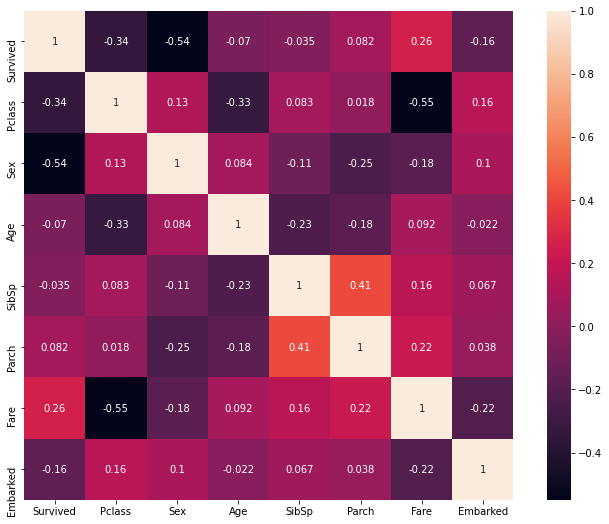

In [15]:
# Visualisation of the Correlation Matrix for the selected columns / features. 
# Refer to https://seaborn.pydata.org/generated/seaborn.heatmap.html for explanation of Heatmap

corrmat = imputedTrainingData.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot = True, square=True);

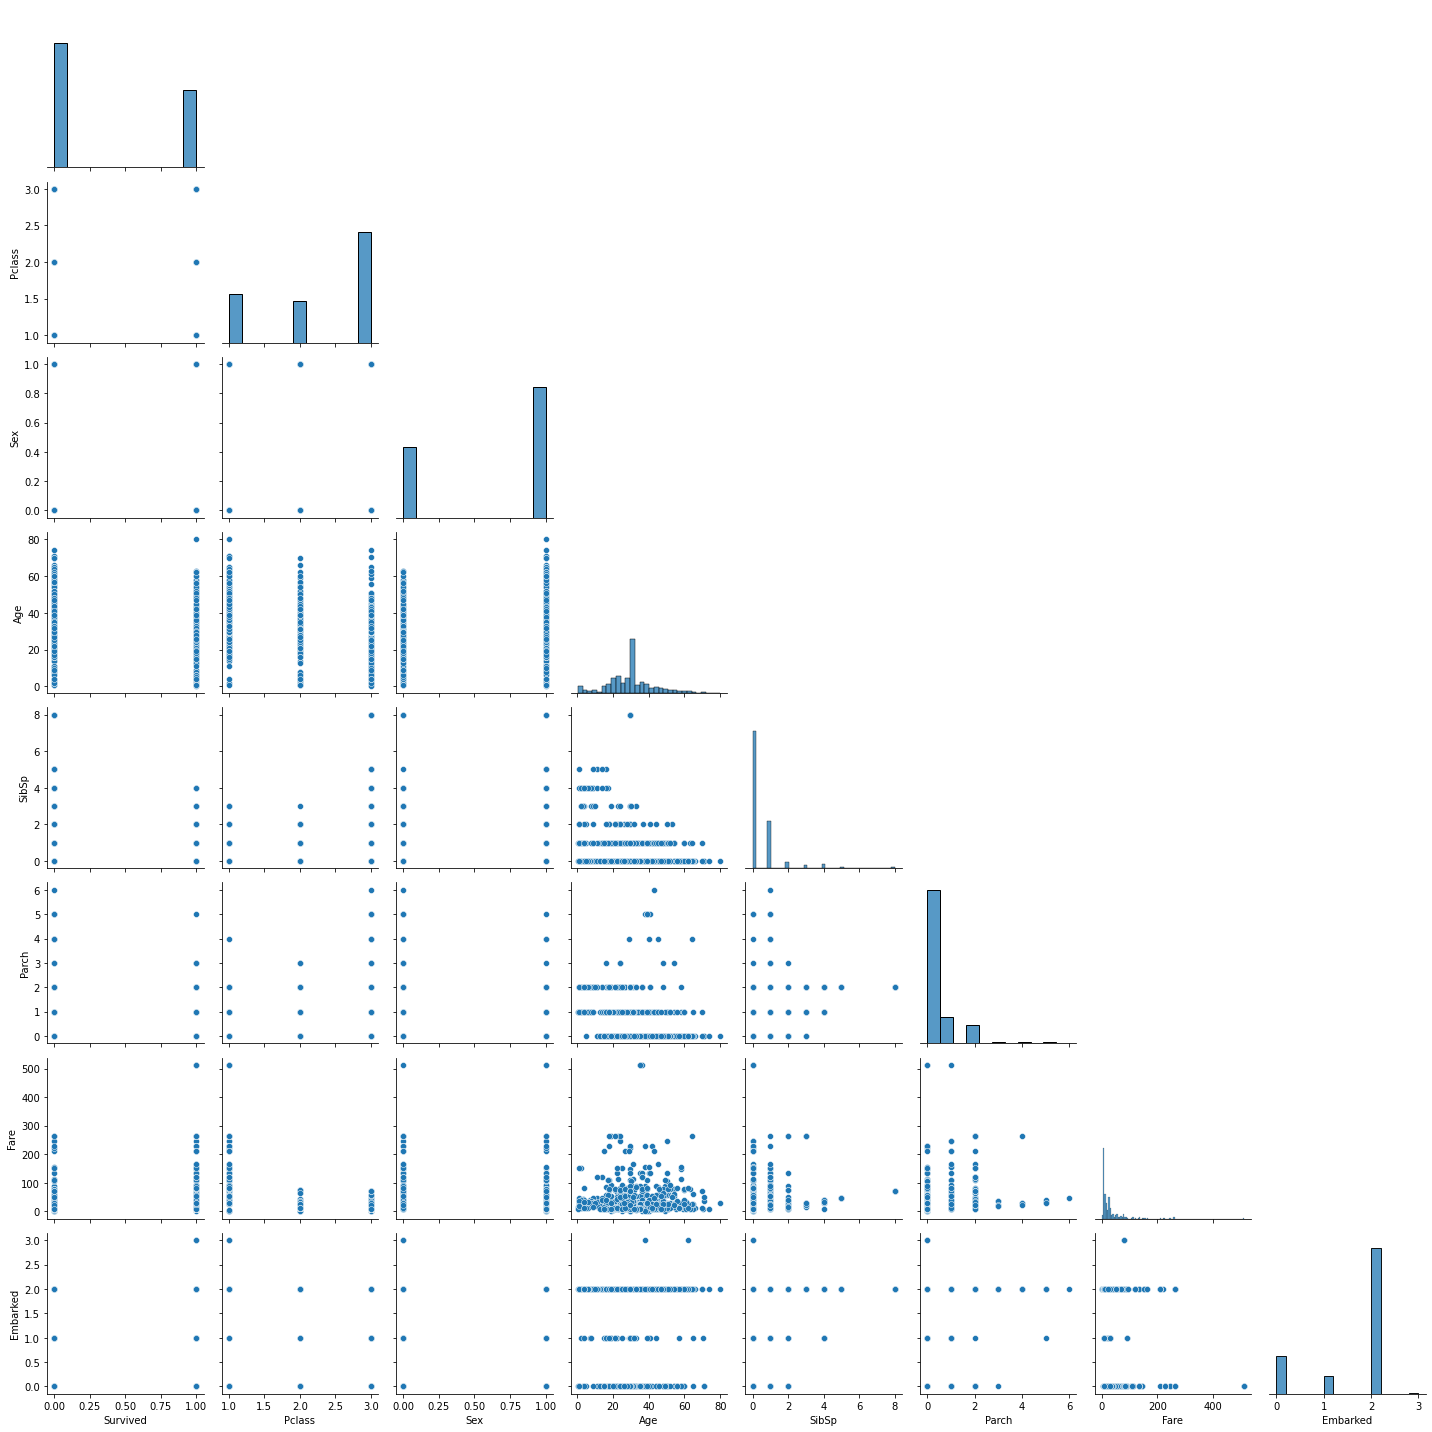

In [16]:
# Pairplot matrix for the selected columns / features. 
# https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot

sns.pairplot(imputedTrainingData, height=2.5, corner=True)
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Survived'>

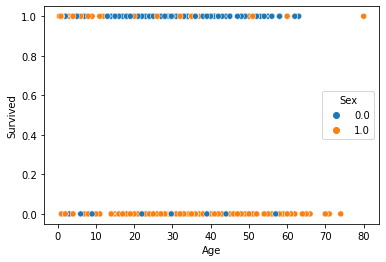

In [17]:
# Scatterplot matrix for "Survived" vs "Age" columns / features with "Sex" as the identifier. 
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

sns.scatterplot( data = imputedTrainingData, x = 'Age', y = 'Survived', hue = 'Sex' )

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

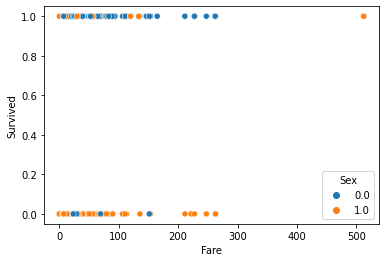

In [18]:
sns.scatterplot( data = imputedTrainingData, x = 'Fare', y = 'Survived', hue = 'Sex' )

## Creating Pipeline
[top](#Contents)

### Long hand approach for Pipeline for Logistic Regression model
[top](#Contents)

In [19]:
target = imputedTrainingData['Survived']
data = imputedTrainingData.drop(['Survived'],axis = 1)

In [20]:
# splitting modified Titanic_train_data into training and test datasets
# for reproduction, I used random_state = 5. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.3, random_state=5)

In [21]:
# to investigate the usefulness of the selected model
from sklearn.linear_model import LogisticRegression
LRC = LogisticRegression(random_state = 5, solver='lbfgs' )
# , max_iter=10000
LRC.fit(X_train,y_train)
predictedLRC_test = LRC.predict(X_test)

In [22]:
LRC.classes_

array([0., 1.])

In [23]:
LRC.coef_

array([[-1.14446197e+00, -2.63532426e+00, -3.53975573e-02,
        -2.96978896e-01, -7.29815828e-02, -1.52314115e-03,
        -1.94996886e-01]])

In [24]:
LRC.intercept_

array([5.2299428])

In [25]:
from sklearn.metrics import classification_report
print( classification_report(y_test,predictedLRC_test) )

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       167
         1.0       0.81      0.69      0.75       101

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



In [26]:
from sklearn.metrics import accuracy_score

# default classification accuracy score
print ( "LRC.score:" , LRC.score(X_test,y_test) )

print ( "LRC accuracy_score:" , accuracy_score (y_test, LRC.predict(X_test) ) )
print ("Both values show that the Logistic Regression model classified accurately", LRC.score(X_test,y_test), "of fraction of the (actual) y_test values")
print('The number of correctly classified y_test is' , accuracy_score(y_test, LRC.predict(X_test), normalize = False) )

LRC.score: 0.8246268656716418
LRC accuracy_score: 0.8246268656716418
Both values show that the Logistic Regression model classified accurately 0.8246268656716418 of fraction of the (actual) y_test values
The number of correctly classified y_test is 221


### **Hint of model.score(X,y) and accuracy_score(y_true,y_predicted)**
[top](#Contents)

The reason that the LRC.score and LRC accuracy_score values are the same is because the function inside `LRC.score(X_test, y_test)` is the `accuracy_score(y_test, LRC.predict(X_test))`. <br>

See the actual codes in the GitHub: https://github.com/scikit-learn/scikit-learn/blob/baf0ea25d/sklearn/base.py#L640 <br>

### Short hand approach for Pipeline for Logistic Regression model
[top](#Contents)

In [27]:
# Pipeline

# to replicate the above process using Pipeline

# must use the DataFrame after dropping column, labelling categorical column/feature, and filling NaN 
targetPipeline = imputedTrainingData['Survived']
dataPipeline = imputedTrainingData.drop(['Survived'],axis = 1)

from sklearn.model_selection import train_test_split
X_train_pipe, X_test_pipe, y_train_pipe, y_test_pipe = train_test_split(dataPipeline, targetPipeline, test_size = 0.3, random_state = 5)

# a useful wrapper tool
from sklearn.pipeline import make_pipeline 

# I do not need to write this again as it has been done above. However, this action assumes I only define Pipeline. 
from sklearn.linear_model import LogisticRegression

pipeline_LR = make_pipeline( LogisticRegression(random_state = 5, solver='lbfgs' ) )
# , max_iter=10000
pipeline_LR.fit(X_train_pipe,y_train_pipe)
y_preds_Pipe_logReg = pipeline_LR.predict(X_test_pipe)
print( 'Test Accuracy: %.16f' % pipeline_LR.score(X_test_pipe,y_test_pipe) )

Test Accuracy: 0.8246268656716418


In [28]:
from sklearn.metrics import classification_report
print( classification_report(y_test_pipe,y_preds_Pipe_logReg) )

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.87       167
         1.0       0.81      0.69      0.75       101

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.81       268
weighted avg       0.82      0.82      0.82       268



### Long hand for Cross Validation for Logistic Regression model
[top](#Contents)

In [29]:
# Cross Validation (CV) for the Logistic Regression with Folds = 10

from sklearn.model_selection import cross_val_score
scores_LR = cross_val_score( LRC, X_train, y_train, cv = 10 )

print('CV accuracy scores: %s' % scores_LR)

# print( 'CV accuracy: %.4f +/- %.4f' % ( np.mean(scores_LR), np.std(scores_LR) )  )

print( f'CV accuracy: {np.mean(scores_LR): .4f} +/- {np.std(scores_LR): .4f} ' )

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CV accuracy scores: [0.80952381 0.84126984 0.85714286 0.79032258 0.82258065 0.74193548
 0.83870968 0.75806452 0.69354839 0.74193548]
CV accuracy:  0.7895 +/-  0.0509 


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Short hand for Cross Validation for Logistic Regression model
[top](#Contents)

In [30]:
# Cross Validation (CV) for the Pipeline with Folds = 10

from sklearn.model_selection import cross_val_score
scores_LR_pipe = cross_val_score( pipeline_LR, X_train_pipe, y_train_pipe, cv = 10 )

print('CV accuracy scores: %s' % scores_LR_pipe)
print( 'CV accuracy: %.4f +/- %.4f' % ( np.mean(scores_LR_pipe), np.std(scores_LR_pipe) )  )

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CV accuracy scores: [0.80952381 0.84126984 0.85714286 0.79032258 0.82258065 0.74193548
 0.83870968 0.75806452 0.69354839 0.74193548]
CV accuracy: 0.7895 +/- 0.0509


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### **Observation on the numbers**
[top](#Contents)

Good thing is Cross Validation (CV) score and its average are the same for both Logistic Regression model, and its equivalent Pipeline. <br>

Note that the average CV score band limit includes the score without CV. <br>
With 10 folds, the average CV score is 0.7895 plus / minus 0.0509 or from 0.7386 to 0.8404. So, the score without the CV, which is 0.8246268656716418, is included in the band limit. <br>

### **Great! The skeleton Pipeline works as expected.**
[top](#Contents)

This is because the Score, Classification Report values, and CV values from the Pipeline match with the single Logistic Regression model.  

### Long hand for adding Scaling to the Logistic Regression model
[top](#Contents)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

standardScaler = StandardScaler()

# this is a shortcut to fit(X_train) and then transform (X_train)
# p = standardScaler.fit_transform(X_train) 

p1 = standardScaler.fit(X_train) 
p2 = p1.transform(X_train)

LRC_Scale = LogisticRegression(random_state = 5, solver='lbfgs' )

# if use p = standardScaler.fit_transform(X_train), then use the below code
# LRC_Scale.fit( p, y_train )

LRC_Scale.fit( p2, y_train )

q = standardScaler.transform(X_test)
predictedLRC_scaling_test = LRC_Scale.predict(q)

print( 'Accuracy: %.16f' % LRC_Scale.score( q, y_test ) )

Accuracy: 0.8208955223880597


### Short hand for adding Scaling to the Pipeline for Logistic Regression model
[top](#Contents)

In [32]:
# adding Scaling to the skeleton Pipeline

from sklearn.preprocessing import StandardScaler

pipeline_LR_upd = make_pipeline( StandardScaler(), LogisticRegression(random_state = 5, solver='lbfgs' ) )
# , max_iter=10000
pipeline_LR_upd.fit(X_train_pipe,y_train_pipe)
y_preds_Pipe_logReg_upd = pipeline_LR_upd.predict(X_test_pipe)

print( 'Accuracy_LogisticRegression_Pipeline: %.16f' % pipeline_LR_upd.score(X_test_pipe,y_test_pipe) )

Accuracy_LogisticRegression_Pipeline: 0.8208955223880597


In [33]:
# Accuracy for the pipeline_LR_upd

from sklearn.metrics import accuracy_score

# default classification accuracy score
print ( "pipeline_LR_upd.score:" , pipeline_LR_upd.score(X_test_pipe,y_test_pipe) )

print ( "pipeline_LR_upd accuracy_score:" , accuracy_score (y_test, pipeline_LR_upd.predict(X_test_pipe) ) )
print ("Both values show that the Logistic Regression model classified accurately", pipeline_LR_upd.score(X_test_pipe,y_test_pipe), "of fraction of the (actual) y_test values")
print('The number of correctly classified y_test is' , accuracy_score(y_test, pipeline_LR_upd.predict(X_test_pipe), normalize = False) )

pipeline_LR_upd.score: 0.8208955223880597
pipeline_LR_upd accuracy_score: 0.8208955223880597
Both values show that the Logistic Regression model classified accurately 0.8208955223880597 of fraction of the (actual) y_test values
The number of correctly classified y_test is 220


### Repeating the above steps for Random Forest Classifier model
[top](#Contents)

In [34]:
# Create Pipeline

pipeline_RFC = make_pipeline( StandardScaler(), RandomForestClassifier(n_estimators = 100, random_state = 5) )
pipeline_RFC.fit(X_train_pipe,y_train_pipe)
print(pipeline_RFC.fit(X_train_pipe,y_train_pipe), "---> pipeline_RFC.fit(X_train,y_train)")
y_preds_Pipe_RdmForClasf = pipeline_RFC.predict(X_test_pipe)
print( 'Accuracy_RandomForestClassifier_Pipeline: %.16f' % pipeline_RFC.score(X_test_pipe,y_test_pipe) )

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=5))]) ---> pipeline_RFC.fit(X_train,y_train)
Accuracy_RandomForestClassifier_Pipeline: 0.8208955223880597


#### **Observation**
[top](#Contents)

The accuracy of the Pipeline containing RandomForestClassifier model, and Standard Scaler is the same as the accuracy of the Pipeline containing LogisticRegression model, and Standard Scaler. <br>

I may have made a mistake somewhere. So I checked if the predictions of y test values are the same for both RandomForestClassifier model, and LogisticRegression model. <br>

Below shows there are some values that do not match. However, this is not a strong validation of the calculation of the accuracy. <br>

The next cell describes how the 2 models behave in terms of `model.predict_proba(X)` method. <br> 

The outcome is conclusive where it shows that the all of the probability estimates for Class 1 calculated from the RandomForestClassifier model do not match with ones from the LogisticRegression model. <br>

This means that the calculation for both accuracies of these models is correct. <br>

In [35]:
# y_preds_Pipe_RdmForClasf = pipeline_RFC.predict(X_test_pipe) 
# y_preds_Pipe_logReg_upd = pipeline_LR_upd.predict(X_test_pipe) 

# https://scikit-learn.org/stable/glossary.html#methods. 
# This explains both the machineLearningModel.predict(X) method and machineLearningModel.predict_proba(X)

y_preds_Pipe_RdmForClasf == y_preds_Pipe_logReg_upd

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,

In [36]:
pipeline_RFC.predict_proba( X_test_pipe )[ : , 1] == pipeline_LR_upd.predict_proba( X_test_pipe )[ : , 1]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [37]:
# Create Classification Report

print( classification_report(y_test_pipe, y_preds_Pipe_RdmForClasf) )

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       167
         1.0       0.80      0.69      0.74       101

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268



In [38]:
# Create Cross Validation

scores_RFC = cross_val_score(pipeline_RFC, X_train_pipe, y_train_pipe, cv=10)

print('CV accuracy scores: %s' % scores_RFC)
print( 'CV accuracy: %.4f +/- %.4f' % ( np.mean(scores_RFC), np.std(scores_RFC) )  )

CV accuracy scores: [0.82539683 0.85714286 0.85714286 0.80645161 0.82258065 0.80645161
 0.90322581 0.75806452 0.72580645 0.82258065]
CV accuracy: 0.8185 +/- 0.0477


## Performance metrics for Classification classifiers
[top](#Contents)

### Long hand for Performance metrics for Logistic Regression model
[top](#Contents)

In [39]:
# Investigate how the model correctly classifies Training and Test data

y_preds_Pipe_logReg_upd_train = pipeline_LR_upd.predict(X_train_pipe)
y_preds_Pipe_logReg_upd_test = pipeline_LR_upd.predict(X_test_pipe)

LRC_train_accuracy_score = accuracy_score( y_train, y_preds_Pipe_logReg_upd_train )
LRC_test_accuracy_score = accuracy_score( y_test, y_preds_Pipe_logReg_upd_test )

print( "Logistic Regression model train / test accuracies %.4f / %.4f" % (LRC_train_accuracy_score, LRC_test_accuracy_score) )

Logistic Regression model train / test accuracies 0.7961 / 0.8209


The train / test accuracies 0.7961 / 0.8209 indicates that the Logistic Regression model is better at predicting correctly unknown dataset (Test dataset) than in the known dataset (Training dataset). <br>

It seems that the Logistic Regression model has less variance based on these 2 accuracies values. <br>

In [40]:
# Create Classification Report to obtain Precision, Recall, and F1-score values on the test dataset

from sklearn.metrics import classification_report
print( classification_report(y_test, y_preds_Pipe_logReg_upd_test) )

              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       167
         1.0       0.81      0.68      0.74       101

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



In [41]:
# Other methods to get Precision, Recall, and F1-score values
# here the focus is on Class 1

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.16f' % precision_score(y_test, y_preds_Pipe_logReg_upd_test, pos_label = 1 ) ) # default pos_label = 1
print('Recall: %.16f' % recall_score(y_test, y_preds_Pipe_logReg_upd_test, pos_label = 1 ) ) # default pos_label = 1
print('F1: %.16f' % f1_score(y_test, y_preds_Pipe_logReg_upd_test, pos_label = 1 ) ) # default pos_label = 1

Precision: 0.8117647058823529
Recall: 0.6831683168316832
F1: 0.7419354838709677


In [42]:
# Other methods to get Precision, Recall, and F1-score values
# here the focus is on Class 0

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score

print('Precision: %.16f' % precision_score(y_test, y_preds_Pipe_logReg_upd_test, pos_label = 0 ) ) # default pos_label = 1
print('Recall: %.16f' % recall_score(y_test, y_preds_Pipe_logReg_upd_test, pos_label = 0 ) ) # default pos_label = 1
print('F1: %.16f' % f1_score(y_test, y_preds_Pipe_logReg_upd_test, pos_label = 0 ) ) # default pos_label = 1

Precision: 0.8251366120218580
Recall: 0.9041916167664671
F1: 0.8628571428571429


In [43]:
# Create Confusion Matrix

from sklearn.metrics import confusion_matrix
confMat = confusion_matrix(y_test, y_preds_Pipe_logReg_upd_test)
print(confMat)

[[151  16]
 [ 32  69]]


### **Note on the Confusion Matrix**
[top](#Contents)

Here is the [User Guide of Scikit-Learn on the Confusion Matrix.](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) <br>
This is my take on the POSITIVE, and NEGATIVE classes that are used in the Confusion Matrix. <br>
It took me a long time to grasp this topic and I think I unblocked the impasse in the understanding. <br>

To start with, Scikit-Learn provides the composition of the Confusion Matrix: <br>

In binary classification, the count of <br> 
true negatives is `C_{0,0}`, <br> 
false positives is `C_{0,1}`, <br>
false negatives is `C_{1,0}`, <br> 
true positives is `C_{1,1}` <br> 

$Cij$ means the location of the cell in the $ith$ row and $jth$ column when ACTUAL (or the GROUND TRUTH) values are on the rows of the Confusion Matrix, and PREDICTED values are in the columns. <br> 
The explanation from the source code is found here: https://github.com/scikit-learn/scikit-learn/blob/baf0ea25d/sklearn/metrics/_classification.py#L222 <br>



Binary classification happens when there are two unique values A, and B in the Dependent variable (*y*). <br>
When the y (*label*) values contain 0s and 1s, Scikit-Learn assigns automatically 1s as the POSITIVE class, and by default 0s as NEGATIVE class in the Confusion Matrix. <br>
If the label values contain other values such as As, and Bs, then you can able to assigned which class is POSITIVE or NEGATIVE class by `pos_label`. <br>


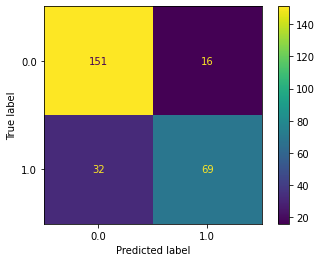

In [44]:
# For better visualisation of the Confusion Matrix

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay( confusion_matrix = confMat, display_labels = LRC.classes_ )
disp.plot()

#### **Explanation on the numbers in the Confusion Matrix**
[top](#Contents)

##### *Focus on class 1*
[top](#Contents)

Class 1 is for survived, and Class 0 is for deceased. <br>
Link: https://www.kaggle.com/competitions/titanic/overview/evaluation <br>
Scikit-Learn assigns Class 0 as NEGATIVE Class, and Class 1 as POSITIVE Class. <br>

From the Confusion Matrix and the Classification Report: <br>
True Negatives (TN)  = 151, <br>
False Positives (FP) = 16, <br>
False Negatives (FN) = 32, <br>
True Positives (TP) = 69 <br>
<br>
where in the Confusion Matrix: <br>
ROWS = ACTUAL values, and COLUMNS = PREDICTED values <br>
Row 1 = Class 0 = NEGATIVE Class <br>
Row 2 = Class 1 = POSITIVE Class <br>
Column 1 = Class 0 = NEGATIVE Class <br>
Column 2 = Class 1 = POSITIVE Class <br>

In [45]:
# the original is found on the https://www.kaggle.com/code/carlmcbrideellis/titanic-in-all-the-confusion
print ("here the FOCUS is on class 1 " )
print()

tn, fp, fn, tp = confMat.ravel()

print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print( f'Total number of correct classification is = (tn + tp) = {tn + tp} ' )
print()

print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print()

print("Fall out or false positive rate (FPR) = fp / N = fp / (fp + tn) =", fp / (fp + tn))
print("Recall (REC) or sensitivity or true positive rate (TPR) = tp / P = tp / (fn + tp) =", tp / (fn + tp))
print("Precision (PRE) = tp / (tp + fp) =", tp / (tp + fp))
print()

print("F1-score = 2 x (PRE x REC) / (PRE + REC) = tp / ( tp + (fn + fp)/2 ) =", tp / ( tp + (fn + fp)/2 ) )
print()

print("Specificity or true negative rate  = tn / (tn + fp) =", tn / (tn + fp))
print("Miss rate or false negative rate = fn / (fn + tp) =", fn / (fn + tp))
print()

print(f"Prediction Error (ERR) = (fp + fn) / (fp + fn + tp + tn) =  { (fp + fn) / (fp + fn + tp + tn) } " )
print(f"Prediction Accuracy (ACC) = (tp + tn) / (fp + fn + tp + tn) = 1 - ERR = { (tp + tn) / (fp + fn + tp + tn) } " )
print()

print(f"ACC matches with the = ** pipeline_LR_upd.score(X_test,y_test) ** = { pipeline_LR_upd.score(X_test,y_test) } " )
print(f"ACC also matches with the = ** accuracy_score( y_test, pipeline_LR_upd.predict(X_test_pipe) ) ** = { accuracy_score( y_test, pipeline_LR_upd.predict(X_test_pipe) ) } " )

here the FOCUS is on class 1 

Number of true negatives  (tn) =  151
Number of true positives  (tp) =  69
Total number of correct classification is = (tn + tp) = 220 

Number of false negatives (fn) =  32
Number of false positives (fp) =  16

Fall out or false positive rate (FPR) = fp / N = fp / (fp + tn) = 0.09580838323353294
Recall (REC) or sensitivity or true positive rate (TPR) = tp / P = tp / (fn + tp) = 0.6831683168316832
Precision (PRE) = tp / (tp + fp) = 0.8117647058823529

F1-score = 2 x (PRE x REC) / (PRE + REC) = tp / ( tp + (fn + fp)/2 ) = 0.7419354838709677

Specificity or true negative rate  = tn / (tn + fp) = 0.9041916167664671
Miss rate or false negative rate = fn / (fn + tp) = 0.31683168316831684

Prediction Error (ERR) = (fp + fn) / (fp + fn + tp + tn) =  0.1791044776119403 
Prediction Accuracy (ACC) = (tp + tn) / (fp + fn + tp + tn) = 1 - ERR = 0.8208955223880597 

ACC matches with the = ** pipeline_LR_upd.score(X_test,y_test) ** = 0.8208955223880597 
ACC also matche

##### *Focus on class 0*
[top](#Contents)

Class 1 is for survived, and Class 0 is for deceased. <br>
Link: https://www.kaggle.com/competitions/titanic/overview/evaluation <br>
Scikit-Learn assigns Class 0 as NEGATIVE Class, and Class 1 as POSITIVE Class. <br>

From the Confusion Matrix and the Classification Report: <br>
True Positives (TP) = 151, <br>
False Negatives (FN) = 16, <br>
False Positives (FP) = 32, <br>
True Negatives (TN) = 69 <br>
<br>
where in the Confusion Matrix: <br>
ROWS = ACTUAL values, and COLUMNS = PREDICTED values <br>
Row 1 = Class 1 = POSITIVE Class <br>
Row 2 = Class 0 = NEGATIVE Class <br>
Column 1 = Class 1 = POSITIVE Class <br>
Column 2 = Class 0 = NEGATIVE Class <br>

In [46]:
print ("here the FOCUS is on class 0 " )
print()

tp, fn, fp, tn = confMat.ravel()

print("Number of true negatives  (tn) = ",tn)
print("Number of true positives  (tp) = ",tp)
print( f'Total number of correct classification is = (tn + tp) = {tn + tp} ' )
print()

print("Number of false negatives (fn) = ",fn)
print("Number of false positives (fp) = ",fp)
print()

print("Fall out or false positive rate (FPR) = fp / N = fp / (fp + tn) =", fp / (fp + tn))
print("Recall (REC) or sensitivity or true positive rate (TPR) = tp / P = tp / (fn + tp) =", tp / (fn + tp))
print("Precision (PRE) = tp / (tp + fp) =", tp / (tp + fp))
print()

print("F1-score = 2 x (PRE x REC) / (PRE + REC) = tp / ( tp + (fn + fp)/2 ) =", tp / ( tp + (fn + fp)/2 ) )
print()

print("Specificity or true negative rate  = tn / (tn + fp) =", tn / (tn + fp))
print("Miss rate or false negative rate = fn / (fn + tp) =", fn / (fn + tp))
print()

print(f"Prediction Error (ERR) = (fp + fn) / (fp + fn + tp + tn) =  { (fp + fn) / (fp + fn + tp + tn) } " )
print(f"Prediction Accuracy (ACC) = (tp + tn) / (fp + fn + tp + tn) = 1 - ERR = { (tp + tn) / (fp + fn + tp + tn) } " )
print()

print(f"ACC matches with the = ** pipeline_LR_upd.score(X_test,y_test) ** = { pipeline_LR_upd.score(X_test,y_test) } " )
print(f"ACC also matches with the = ** accuracy_score( y_test, pipeline_LR_upd.predict(X_test_pipe) ) ** = { accuracy_score( y_test, pipeline_LR_upd.predict(X_test_pipe) ) } " )

here the FOCUS is on class 0 

Number of true negatives  (tn) =  69
Number of true positives  (tp) =  151
Total number of correct classification is = (tn + tp) = 220 

Number of false negatives (fn) =  16
Number of false positives (fp) =  32

Fall out or false positive rate (FPR) = fp / N = fp / (fp + tn) = 0.31683168316831684
Recall (REC) or sensitivity or true positive rate (TPR) = tp / P = tp / (fn + tp) = 0.9041916167664671
Precision (PRE) = tp / (tp + fp) = 0.825136612021858

F1-score = 2 x (PRE x REC) / (PRE + REC) = tp / ( tp + (fn + fp)/2 ) = 0.8628571428571429

Specificity or true negative rate  = tn / (tn + fp) = 0.6831683168316832
Miss rate or false negative rate = fn / (fn + tp) = 0.09580838323353294

Prediction Error (ERR) = (fp + fn) / (fp + fn + tp + tn) =  0.1791044776119403 
Prediction Accuracy (ACC) = (tp + tn) / (fp + fn + tp + tn) = 1 - ERR = 0.8208955223880597 

ACC matches with the = ** pipeline_LR_upd.score(X_test,y_test) ** = 0.8208955223880597 
ACC also matches

### **Calculation of the roc_curve, and roc_auc_score**
[top](#Contents)

Here the focus in on class 1

value of fpr = [0.         0.         0.         0.00598802 0.00598802 0.01197605
 0.01197605 0.01197605 0.01197605 0.01796407 0.01796407 0.02994012
 0.02994012 0.03592814 0.03592814 0.04790419 0.04790419 0.04790419
 0.05389222 0.05389222 0.06586826 0.06586826 0.08383234 0.08383234
 0.08982036 0.08982036 0.09580838 0.09580838 0.11976048 0.11976048
 0.1257485  0.1257485  0.13772455 0.13772455 0.16167665 0.16167665
 0.19161677 0.19161677 0.25149701 0.26946108 0.2754491  0.28742515
 0.29341317 0.29341317 0.33532934 0.34131737 0.34131737 0.34730539
 0.34730539 0.36526946 0.36526946 0.37724551 0.37724551 0.38922156
 0.4011976  0.43712575 0.46107784 0.47305389 0.47305389 0.54491018
 0.54491018 0.61676647 0.64071856 0.65269461 0.69461078 0.69461078
 0.71856287 0.71856287 0.73652695 0.75449102 0.76047904 0.76047904
 0.76646707 0.79041916 0.79041916 0.80239521 0.80239521 0.82035928
 0.82035928 0.83233533 0.83233533 0.91017964 0.91017964 0.98802395
 1.        ]

val

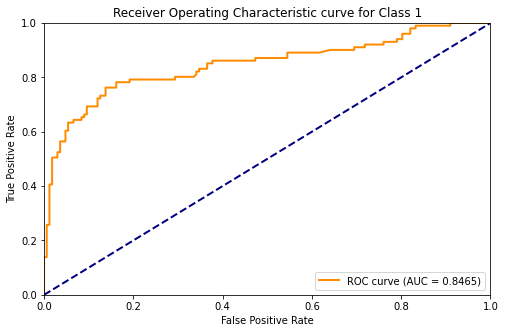

In [47]:
# https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics
# example from the Scikit Learn, section 3.3.2.15. Receiver operating characteristic (ROC)

print("Here the focus in on class 1")
print()

y_score_predict_proba_X_test_pipe_1 = pipeline_LR_upd.predict_proba( X_test_pipe )[ : , 1]

import numpy as np

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve( y_test, y_score_predict_proba_X_test_pipe_1, pos_label = 1 ) # pos_label value is from the y_test
print(f"value of fpr = {fpr}")
print()
print(f"value of tpr = {tpr}")
print()
print(f"value of thresholds = {thresholds}")
print()

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score( y_test, y_score_predict_proba_X_test_pipe_1 )
print(f"AUC = {roc_auc}")
print()

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve for Class 1')
plt.legend(loc="lower right")
plt.show()

Here the focus in on class 0

value of fpr = [0.         0.         0.         0.00990099 0.00990099 0.01980198
 0.01980198 0.03960396 0.03960396 0.05940594 0.05940594 0.06930693
 0.06930693 0.06930693 0.07920792 0.07920792 0.07920792 0.07920792
 0.08910891 0.08910891 0.0990099  0.0990099  0.0990099  0.10891089
 0.10891089 0.12871287 0.12871287 0.13861386 0.13861386 0.13861386
 0.13861386 0.13861386 0.13861386 0.14851485 0.14851485 0.16831683
 0.16831683 0.17821782 0.17821782 0.18811881 0.1980198  0.1980198
 0.20792079 0.20792079 0.20792079 0.20792079 0.20792079 0.20792079
 0.21782178 0.21782178 0.23762376 0.23762376 0.26732673 0.26732673
 0.27722772 0.27722772 0.30693069 0.30693069 0.33663366 0.33663366
 0.34653465 0.34653465 0.35643564 0.35643564 0.36633663 0.36633663
 0.3960396  0.3960396  0.41584158 0.43564356 0.43564356 0.47524752
 0.47524752 0.4950495  0.4950495  0.59405941 0.59405941 0.68316832
 0.7029703  0.74257426 0.74257426 0.86138614 0.86138614 1.        ]

value of tpr = [

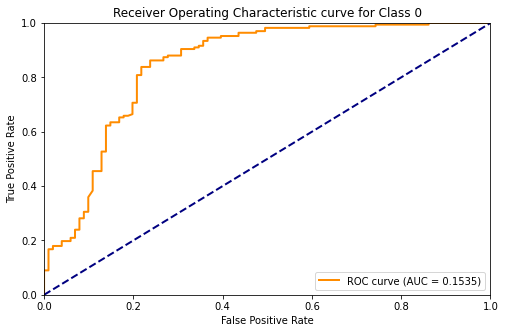

In [48]:
print("Here the focus in on class 0")
print()

y_score_predict_proba_X_test_pipe_0 = pipeline_LR_upd.predict_proba( X_test_pipe )[ : , 0]

import numpy as np

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve( y_test, y_score_predict_proba_X_test_pipe_0, pos_label = 0 ) # pos_label value is from the y_test
print(f"value of fpr = {fpr}")
print()
print(f"value of tpr = {tpr}")
print()
print(f"value of thresholds = {thresholds}")
print()

from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score( y_test, y_score_predict_proba_X_test_pipe_0 )
print(f"AUC = {roc_auc}")
print()

plt.figure(figsize = (8,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic curve for Class 0')
plt.legend(loc="lower right")
plt.show()

### Side Note on Logisitic Regression in calculating roc_curve or roc_auc_score
[top](#Contents)

<br>

` sklearn.metrics.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True) ` <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html <br>

` sklearn.metrics.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None) ` <br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html <br>

There are two ways to calculate `y_score` for Logistic Regression, which are: <br>
* decision_function <br>
* predict_proba <br>
[The 2 methods in the Logistic Regression model in the Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) <br>

I was confused why there are 2 ways to compute y_score. After digging for quite some time, I found this work done by the Scikit-Learn developers: <br>
https://github.com/scikit-learn/scikit-learn/issues/1404 <br>
<br>
From the responsible developer: <br>
*I'm the one who added this. The motivation was to be able to use regressors (e.g. Lasso or ElasticNet) as base estimator in the multiclass module. I don't really see the problem as for me, in the regression case, decision_function and predict should be aliases of each other. We can modifiy the multiclass module to directly call predict when the base estimator is a regressor (that seems like a good idea in any case to support regressors that don't implement decision_function).* <br>

Essentially I found out that the: <br>

> `LogisticRegression.decision_function(some_X_values)` = `LogisticRegression.predict_proba(some_X_values)[ : , positive class]`

Below are the validations I did. <br>

In [49]:
from sklearn.metrics import roc_auc_score
AUC = roc_auc_score( y_test, pipeline_LR_upd.decision_function(X_test_pipe) )
print("The value of the Area Under Curve for Logistic Regression is:", AUC)

The value of the Area Under Curve for Logistic Regression is: 0.8465346534653466


In [50]:
yPredictTest_01 = pipeline_LR_upd.predict_proba( X_test_pipe )[ : , 1]

print(f"The value of the Area Under Curve of Positive Class (in this case class 1) for Logistic Regression is: { roc_auc_score( y_test, yPredictTest_01 ) } ")

The value of the Area Under Curve of Positive Class (in this case class 1) for Logistic Regression is: 0.8465346534653466 


In [51]:
yPredictTest_00 = pipeline_LR_upd.predict_proba( X_test_pipe )[ : , 0 ]

print(f"The value of the Area Under Curve of Negative Class (in this case class 0) for Logistic Regression is: { roc_auc_score( y_test, yPredictTest_00 ) } " )

The value of the Area Under Curve of Negative Class (in this case class 0) for Logistic Regression is: 0.1534653465346535 


In [52]:
Total_Area_Under_Curve = yPredictTest_01 + yPredictTest_00
print( Total_Area_Under_Curve )
print()
print( "Note that the sum of both values is equal to 1, which is equal to the total area under curve! ")
print()
print(f"Total_Area_Under_Curve.shape = {Total_Area_Under_Curve.shape}")
k = Total_Area_Under_Curve.sum(axis = 0) # axis = 0 means row
print(f"total number of rows or number of passengers in the test datasets is {k}")

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1.]

Note that the sum of both values is equal to 1, which is equal to the total area under curve! 

Total_Area_Under_Curve.shape = (268,)
total number of rows or number of passengers in 

### Short hand for Performance metrics for Random Forest Classifier model
[top](#Contents)

In [53]:
# Create a custom Function to calculate Performance Metrics for a specified model 

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

def calculateClassificationClassifierPerformanceMetrics(xTrain, yTrain, xTest, yTest, classifierModel):
    predicted_yTrain = classifierModel.predict(xTrain)
    predicted_yTest = classifierModel.predict(xTest)
    # print("\n prediction of yTrain value", predicted_yTrain) # for debugging
    # print("\n prediction of yTest value", predicted_yTest) # for debugging
    model_train_accuracy_score = accuracy_score( yTrain, predicted_yTrain )
    model_test_accuracy_score = accuracy_score( yTest, predicted_yTest )
    print( f"{classifierModel} model train / test accuracies %.4f / %.4f" % ( model_train_accuracy_score, model_test_accuracy_score ) ) # using Python f-strings
    print( "\n classification report on {yTest} vs {predicted_yTest} dataset: \n", classification_report( yTest, predicted_yTest ) )
    print()
    print("Precision value of {yTest} vs {predicted_yTest} dataset, based on class 0: %.16f" % precision_score( yTest, predicted_yTest, pos_label = 0 ) ) # default pos_label = 1
    print('Recall value of {yTest} vs {predicted_yTest} dataset, based on class 0: %.16f' % recall_score( yTest, predicted_yTest, pos_label = 0 ) ) # default pos_label = 1
    print('F1 value of {yTest} vs {predicted_yTest} dataset, based on class 0: %.16f' % f1_score( yTest, predicted_yTest, pos_label = 0 ) ) # default pos_label = 1
    print()
    print("Precision value of {yTest} vs {predicted_yTest} dataset, based on class 1: %.16f" % precision_score( yTest, predicted_yTest, pos_label = 1 ) ) # default pos_label = 1
    print('Recall value of {yTest} vs {predicted_yTest} dataset, based on class 1: %.16f' % recall_score( yTest, predicted_yTest, pos_label = 1 ) ) # default pos_label = 1
    print('F1 value of {yTest} vs {predicted_yTest} dataset, based on class 1: %.16f' % f1_score( yTest, predicted_yTest, pos_label = 1 ) ) # default pos_label = 1
    print()
    AUC_0 = roc_auc_score( yTest, classifierModel.predict_proba( xTest )[ : , 0] ) # default provides ALL classes
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=roc_auc_score#sklearn.metrics.roc_auc_score
    print( f"\n The value of the Area Under Curve of Positive Class i.e. Class 0 for {classifierModel} is:" , AUC_0)
    print()
    AUC_1 = roc_auc_score( yTest, classifierModel.predict_proba( xTest )[ : , 1] ) # default provides ALL classes
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html?highlight=roc_auc_score#sklearn.metrics.roc_auc_score
    print( f"\n The value of the Area Under Curve of Positive Class i.e. Class 1 for {classifierModel} is:" , AUC_1)
    print()
    confMat = confusion_matrix( yTest, predicted_yTest )
    print("\n Confusion Matrix of {yTest} vs {predicted_yTest} dataset: \n", confMat)
    print()
    print("\n Visualisation of the Confusion Matrix: \n")
    disp = ConfusionMatrixDisplay( confusion_matrix = confMat, display_labels = classifierModel.classes_ )
    disp.plot()
    print()
    

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=5))]) model train / test accuracies 0.9856 / 0.8209

 classification report on {yTest} vs {predicted_yTest} dataset: 
               precision    recall  f1-score   support

         0.0       0.83      0.90      0.86       167
         1.0       0.80      0.69      0.74       101

    accuracy                           0.82       268
   macro avg       0.82      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268


Precision value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8287292817679558
Recall value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8982035928143712
F1 value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8620689655172413

Precision value of {yTest} vs {predicted_yTest} dataset, based on class 1: 0.8045977011494253
Recall value of {yTest} vs {predicte

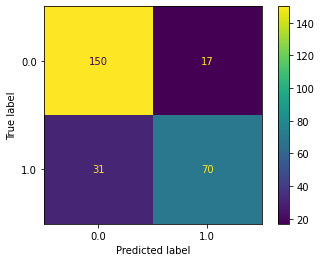

In [54]:
calculateClassificationClassifierPerformanceMetrics( X_train_pipe, y_train_pipe, X_test_pipe, y_test_pipe, pipeline_RFC )

### For more Classification performance metrics
[top](#Contents)

If you want to know more about other metrics, see the below link:

> https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics <br>
> Section 3.3.2

### Ensemble methods for Classification 
[top](#Contents)

1. AdaBoostClassifier
2. BaggingClassifier

#### AdaBoostClassifier ensemble model
[top](#Contents)

Applying the AdaBoostClassifier ensemble model for both Logistic Regression, and Random Forest Classifier models. <br>

In [55]:
# to perform ensemble method: e.g. Logistic Regression, Random Forest Classifier
# https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20ensemble#module-sklearn.ensemble

from sklearn.ensemble import AdaBoostClassifier

ensembleAdaBoostClassifierLogisticRegression = AdaBoostClassifier( base_estimator = LogisticRegression(random_state = 5, solver='lbfgs' ), random_state= 5 )

ensembleAdaBoostClassifierRandomForestClassifier = AdaBoostClassifier( base_estimator = RandomForestClassifier(n_estimators = 100, random_state = 5), random_state= 5 )

ensembleAdaBoostClassifierLogisticRegression.fit( X_train_pipe,y_train_pipe )
ensembleAdaBoostClassifierLogisticRegression.predict( X_test_pipe )

ensembleAdaBoostClassifierRandomForestClassifier.fit( X_train_pipe,y_train_pipe )
ensembleAdaBoostClassifierRandomForestClassifier.predict( X_test_pipe )

print("ensembleAdaBoostClassifierLogisticRegression score:", ensembleAdaBoostClassifierLogisticRegression.score(X_test_pipe,y_test_pipe ) )
print("ensembleAdaBoostClassifierRandomForestClassifier score:", ensembleAdaBoostClassifierRandomForestClassifier.score(X_test_pipe,y_test_pipe ) )

ensembleAdaBoostClassifierLogisticRegression score: 0.8283582089552238
ensembleAdaBoostClassifierRandomForestClassifier score: 0.8171641791044776


In [56]:
# to investigate how the model correctly classifies Training and Test data
ensembleAdaBoostClassifierLogisticRegression_train = ensembleAdaBoostClassifierLogisticRegression.predict( X_train_pipe )
ensembleAdaBoostClassifierLogisticRegression_test = ensembleAdaBoostClassifierLogisticRegression.predict( X_test_pipe )

ensembleAdaBoostClassifierLogisticRegression_train_accuracy_score = accuracy_score( y_train_pipe, 
                                                                                   ensembleAdaBoostClassifierLogisticRegression_train )

ensembleAdaBoostClassifierLogisticRegression_test_accuracy_score = accuracy_score( y_test_pipe, 
                                                                                  ensembleAdaBoostClassifierLogisticRegression_test )

print( "ensembleAdaBoostClassifierLogisticRegression model train / test accuracies %.4f / %.4f" 
      % (ensembleAdaBoostClassifierLogisticRegression_train_accuracy_score, 
         ensembleAdaBoostClassifierLogisticRegression_test_accuracy_score) )

ensembleAdaBoostClassifierLogisticRegression model train / test accuracies 0.7978 / 0.8284


In [57]:
# to investigate how the model correctly classifies Training and Test data
ensembleAdaBoostClassifierRandomForestClassifier_train = ensembleAdaBoostClassifierRandomForestClassifier.predict( X_train_pipe )
ensembleAdaBoostClassifierRandomForestClassifier_test = ensembleAdaBoostClassifierRandomForestClassifier.predict( X_test_pipe )

ensembleAdaBoostClassifierRandomForestClassifier_train_accuracy_score = accuracy_score( y_train_pipe, 
                                                                                   ensembleAdaBoostClassifierRandomForestClassifier_train )

ensembleAdaBoostClassifierRandomForestClassifier_test_accuracy_score = accuracy_score( y_test_pipe, 
                                                                                  ensembleAdaBoostClassifierRandomForestClassifier_test )

print( "ensembleAdaBoostClassifierRandomForestClassifier model train / test accuracies %.4f / %.4f" 
      % (ensembleAdaBoostClassifierRandomForestClassifier_train_accuracy_score, 
         ensembleAdaBoostClassifierRandomForestClassifier_test_accuracy_score) )

ensembleAdaBoostClassifierRandomForestClassifier model train / test accuracies 0.9856 / 0.8172


#### BaggingClassifier ensemble model
[top](#Contents)

Applying the BaggingClassifier ensemble model for both Logistic Regression, and Random Forest Classifier models. <br>

In [58]:
from sklearn.ensemble import BaggingClassifier

ensembleBaggingClassifierLogisticRegression = BaggingClassifier( base_estimator = LogisticRegression(random_state = 5, solver='lbfgs' ),
                                                               n_estimators = 500,
                                                               max_samples = 1,
                                                               max_features = 1,
                                                               bootstrap = True,
                                                               bootstrap_features = False,
                                                               n_jobs = 1,
                                                               random_state = 5) 
# default values: n_estimators = 10, max_samples = 1, max_features = 1, bootstrap = True, bootstrap_features = False, n_jobs = None (i.e. 1)   

ensembleBaggingClassifierRandomForestClassifier = BaggingClassifier( base_estimator = RandomForestClassifier(n_estimators = 100, random_state = 5),
                                                               n_estimators = 500,
                                                               max_samples = 1,
                                                               max_features = 1,
                                                               bootstrap = True,
                                                               bootstrap_features = False,
                                                               n_jobs = 1,
                                                               random_state = 5)


ensembleBaggingClassifierLogisticRegression.fit( X_train_pipe,y_train_pipe )
ensembleBaggingClassifierLogisticRegression.predict( X_test_pipe )

ensembleBaggingClassifierRandomForestClassifier.fit( X_train_pipe,y_train_pipe )
ensembleBaggingClassifierRandomForestClassifier.predict( X_test_pipe )

print("ensembleBaggingClassifierLogisticRegression score:", ensembleBaggingClassifierLogisticRegression.score(X_test_pipe,y_test_pipe ) )

print("ensembleBaggingClassifierRandomForestClassifier score:", ensembleBaggingClassifierRandomForestClassifier.score(X_test_pipe,y_test_pipe ) )


ensembleBaggingClassifierLogisticRegression score: 0.6231343283582089
ensembleBaggingClassifierRandomForestClassifier score: 0.6231343283582089


In [59]:
# to investigate how the model correctly classifies Training and Test data
ensembleBaggingClassifierLogisticRegression_train = ensembleBaggingClassifierLogisticRegression.predict( X_train_pipe )
ensembleBaggingClassifierLogisticRegression_test = ensembleBaggingClassifierLogisticRegression.predict( X_test_pipe )

ensembleBaggingClassifierLogisticRegression_train_accuracy_score = accuracy_score( y_train_pipe, 
                                                                                   ensembleBaggingClassifierLogisticRegression_train )

ensembleBaggingClassifierLogisticRegression_test_accuracy_score = accuracy_score( y_test_pipe, 
                                                                                  ensembleBaggingClassifierLogisticRegression_test )

print( "ensembleBaggingClassifierLogisticRegression model train / test accuracies %.4f / %.4f" 
      % (ensembleBaggingClassifierLogisticRegression_train_accuracy_score, 
         ensembleBaggingClassifierLogisticRegression_test_accuracy_score) )

ensembleBaggingClassifierLogisticRegression model train / test accuracies 0.6132 / 0.6231


In [60]:
# to investigate how the model correctly classifies Training and Test data
ensembleBaggingClassifierRandomForestClassifier_train = ensembleBaggingClassifierRandomForestClassifier.predict( X_train_pipe )
ensembleBaggingClassifierRandomForestClassifier_test = ensembleBaggingClassifierRandomForestClassifier.predict( X_test_pipe )

ensembleBaggingClassifierRandomForestClassifier_train_accuracy_score = accuracy_score( y_train_pipe, 
                                                                                   ensembleBaggingClassifierRandomForestClassifier_train )

ensembleBaggingClassifierRandomForestClassifier_test_accuracy_score = accuracy_score( y_test_pipe, 
                                                                                  ensembleBaggingClassifierRandomForestClassifier_test )

print( "ensembleBaggingClassifierRandomForestClassifier model train / test accuracies %.4f / %.4f" 
      % (ensembleBaggingClassifierRandomForestClassifier_train_accuracy_score, 
         ensembleBaggingClassifierRandomForestClassifier_test_accuracy_score) )

ensembleBaggingClassifierRandomForestClassifier model train / test accuracies 0.6132 / 0.6231


## Shortcut to Performance metrics for
[top](#Contents)

1. AdaBoostClassifier
2. BaggingClassifier

### AdaBoostClassifier of Logistic Regression
[top](#Contents)

AdaBoostClassifier(base_estimator=LogisticRegression(random_state=5),
                   random_state=5) model train / test accuracies 0.7978 / 0.8284

 classification report on {yTest} vs {predicted_yTest} dataset: 
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87       167
         1.0       0.81      0.71      0.76       101

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.81       268
weighted avg       0.83      0.83      0.83       268


Precision value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8379888268156425
Recall value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8982035928143712
F1 value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8670520231213873

Precision value of {yTest} vs {predicted_yTest} dataset, based on class 1: 0.8089887640449438
Recall value of {yTest} vs {predicted_yTest} dataset, based on class 1: 0.7128712871287

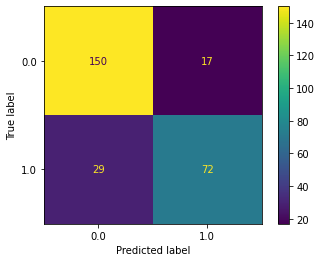

In [61]:
calculateClassificationClassifierPerformanceMetrics( X_train_pipe, y_train_pipe, X_test_pipe, y_test_pipe, ensembleAdaBoostClassifierLogisticRegression )

### AdaBoostClassifier of Random Forest Classifier
[top](#Contents)

AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=5),
                   random_state=5) model train / test accuracies 0.9856 / 0.8172

 classification report on {yTest} vs {predicted_yTest} dataset: 
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       167
         1.0       0.78      0.71      0.75       101

    accuracy                           0.82       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.82      0.82      0.82       268


Precision value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8352272727272727
Recall value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8802395209580839
F1 value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.8571428571428571

Precision value of {yTest} vs {predicted_yTest} dataset, based on class 1: 0.7826086956521739
Recall value of {yTest} vs {predicted_yTest} dataset, based on class 1: 0.712871287

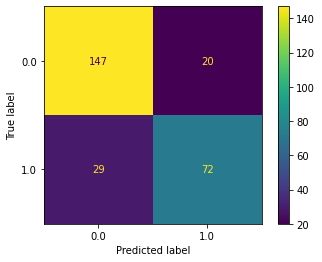

In [62]:
calculateClassificationClassifierPerformanceMetrics( X_train_pipe, y_train_pipe, X_test_pipe, y_test_pipe, ensembleAdaBoostClassifierRandomForestClassifier )

### BaggingClassifier of Logistic Regression 
[top](#Contents)

BaggingClassifier(base_estimator=LogisticRegression(random_state=5),
                  max_features=1, max_samples=1, n_estimators=500, n_jobs=1,
                  random_state=5) model train / test accuracies 0.6132 / 0.6231

 classification report on {yTest} vs {predicted_yTest} dataset: 
               precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       167
         1.0       0.00      0.00      0.00       101

    accuracy                           0.62       268
   macro avg       0.31      0.50      0.38       268
weighted avg       0.39      0.62      0.48       268


Precision value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.6231343283582089
Recall value of {yTest} vs {predicted_yTest} dataset, based on class 0: 1.0000000000000000
F1 value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.7678160919540230

Precision value of {yTest} vs {predicted_yTest} dataset, based on class 1: 0.0000000000000000
Recall value

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat

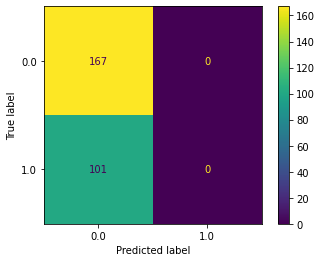

In [63]:
calculateClassificationClassifierPerformanceMetrics( X_train_pipe, y_train_pipe, X_test_pipe, y_test_pipe, ensembleBaggingClassifierLogisticRegression )

### BaggingClassifier of Random Forest Classifier
[top](#Contents)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=5),
                  max_features=1, max_samples=1, n_estimators=500, n_jobs=1,
                  random_state=5) model train / test accuracies 0.6132 / 0.6231

 classification report on {yTest} vs {predicted_yTest} dataset: 
               precision    recall  f1-score   support

         0.0       0.62      1.00      0.77       167
         1.0       0.00      0.00      0.00       101

    accuracy                           0.62       268
   macro avg       0.31      0.50      0.38       268
weighted avg       0.39      0.62      0.48       268


Precision value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.6231343283582089
Recall value of {yTest} vs {predicted_yTest} dataset, based on class 0: 1.0000000000000000
F1 value of {yTest} vs {predicted_yTest} dataset, based on class 0: 0.7678160919540230

Precision value of {yTest} vs {predicted_yTest} dataset, based on class 1: 0.0000000000000000
Recall v

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classificat


 The value of the Area Under Curve of Positive Class i.e. Class 0 for BaggingClassifier(base_estimator=RandomForestClassifier(random_state=5),
                  max_features=1, max_samples=1, n_estimators=500, n_jobs=1,
                  random_state=5) is: 0.5


 The value of the Area Under Curve of Positive Class i.e. Class 1 for BaggingClassifier(base_estimator=RandomForestClassifier(random_state=5),
                  max_features=1, max_samples=1, n_estimators=500, n_jobs=1,
                  random_state=5) is: 0.5


 Confusion Matrix of {yTest} vs {predicted_yTest} dataset: 
 [[167   0]
 [101   0]]


 Visualisation of the Confusion Matrix: 




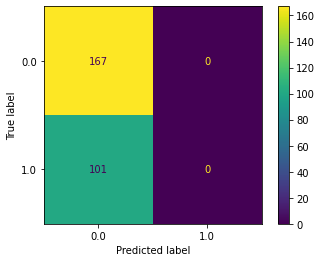

In [64]:
calculateClassificationClassifierPerformanceMetrics( X_train_pipe, y_train_pipe, X_test_pipe, y_test_pipe, ensembleBaggingClassifierRandomForestClassifier )

## Classify who Survived and Died in the "Titanic_to_predict_data" dataframe i.e. `titanic/test.csv file`
[top](#Contents)

### Preprocessing step for Titanic_to_predict_data dataframe
[top](#Contents)

In [65]:
# to do to clean Titanic_to_predict_data dataframe -> drop, classify, impute

dropPredictData = Titanic_to_predict_data.copy()
dropPredictData = dropPredictData.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [66]:
from sklearn.preprocessing import LabelEncoder

columnLabelEncoder = [ 'Sex', 'Embarked' ]

for column in columnLabelEncoder:
    le = LabelEncoder()
    le.fit( dropPredictData[column] )
    dropPredictData[column] = le.transform( dropPredictData[column] )


` from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dropPredictData['Sex'])
le.classes_
dropPredictData['Sex'] = le.transform(dropPredictData['Sex'])`

` from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(dropPredictData['Embarked'])
le.classes_
dropPredictData['Embarked'] = le.transform(dropPredictData['Embarked']) `

In [67]:
from sklearn.impute import SimpleImputer
simpleImp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputedPredictData=pd.DataFrame(simpleImp.fit_transform(dropPredictData), columns = dropPredictData.columns)

## Submission of Predictions to the Kaggle´s Titanic
[top](#Contents)

### Long hand for submitting Classifier models
[top](#Contents)

In [68]:
# using prediction model from Pipeline to classify titanic/test.csv
y_preds_Pipe_logReg_titanicTest = pipeline_LR.predict(imputedPredictData)
y_preds_Pipe_logReg_titanicTest = y_preds_Pipe_logReg_titanicTest.astype(int) # --> this changed the format to integer for Submission purpose.

output = pd.DataFrame({'PassengerId': Titanic_to_predict_data.PassengerId, 'Survived': y_preds_Pipe_logReg_titanicTest})
output.to_csv('pipeline_logReg_submission.csv', index=False) #pipeline Log Reg
print("Your submission was successfully saved!")

# Public score = 0.76555
# According to Kaggle this number indicates this model I used predicted correctly for 76.555% of passengers in the test.csv survived.

Your submission was successfully saved!


In [69]:
y_preds_Pipe_Upd_logReg_titanicTest = pipeline_LR_upd.predict(imputedPredictData).astype(int)

output = pd.DataFrame({'PassengerId': Titanic_to_predict_data.PassengerId, 'Survived': y_preds_Pipe_Upd_logReg_titanicTest})
output.to_csv('pipeline_logReg_Upd_submission.csv', index=False) #pipeline Log Reg Upd with Standard Scaler function
print("Your submission was successfully saved!")

# Public score = 0.76315

Your submission was successfully saved!


In [70]:
y_preds_Pipe_RdmForClasf_titanicTest = pipeline_RFC.predict(imputedPredictData).astype(int)

output = pd.DataFrame({'PassengerId': Titanic_to_predict_data.PassengerId, 'Survived': y_preds_Pipe_RdmForClasf_titanicTest})
output.to_csv('pipeline_rdmForClasf_submission.csv', index=False) #trial pipeline Random Forest Classifier
print("Your submission was successfully saved!")

# Public score = 0.73205

Your submission was successfully saved!


### Short hand for submitting other Classifier models
[top](#Contents)

In [71]:
nameModel = ["AdaBoostClassifier with LogisticRegression",
             "AdaBoostClassifier with RandomForestClassifier",
             "BaggingClassifier with LogisticRegression",
             "BaggingClassifier with RandomForestClassifier"]

modelClassifiers = [ensembleAdaBoostClassifierLogisticRegression, 
                    ensembleAdaBoostClassifierRandomForestClassifier,
                    ensembleBaggingClassifierLogisticRegression,
                    ensembleBaggingClassifierRandomForestClassifier]

for name, clf in zip(nameModel, modelClassifiers):
    y_preds = clf.predict(imputedPredictData).astype(int)
    output = pd.DataFrame( {'PassengerId': Titanic_to_predict_data.PassengerId, 'Survived': y_preds} )
    fileName = name + "_submission.csv"
    output.to_csv( fileName, index=False) 
    # output.to_csv( '{name}_submission.csv', index=False)  # --> how to include a variable with text for the ".to_csv"
    print( name, ": Your submission was successfully saved!")

AdaBoostClassifier with LogisticRegression : Your submission was successfully saved!
AdaBoostClassifier with RandomForestClassifier : Your submission was successfully saved!
BaggingClassifier with LogisticRegression : Your submission was successfully saved!
BaggingClassifier with RandomForestClassifier : Your submission was successfully saved!


#### **Notes**
[top](#Contents)

Public scores of the following model in the Kaggle´s Titanic Competition: <br>

AdaBoostClassifier with LogisticRegression = 0.76555 <br>
AdaBoostClassifier with RandomForestClassifier = 0.74162 <br>
BaggingClassifier with LogisticRegression = 0.62200 <br>
BaggingClassifier with RandomForestClassifier = 0.62200 <br>

Benchmark is 0.76555. This Public score came from submitting a csv file that predicted ALL females survived in the titanic/test.csv file. <br>

## Useful things to have for the next project
[top](#Contents)

* Creating a preprocessing shortcut i.e. creating a (python) Function that does the preprocessing. 
+ Using the pipeline for a model to fit, and predict a label.
- Using Performance metric function `calculateClassificationClassifierPerformanceMetrics(xTrain, yTrain, xTest, yTest, classifierModel)` .
* Using the below Function that calcuates mean, median, and mode for a column / Feature. 
+ Use a script to automatically executes the all of the above, and add or remove a machine learning model. 

In [72]:
# adding Python Function to calculate mean, median, and mode for a column
# https://www.w3schools.com/python/module_statistics.asp

import statistics

import seaborn as sns

def myFirstFunction(columnOrFeature):
    meanColumnOrFeature = statistics.mean(columnOrFeature)
    medianColumnOrFeature = statistics.median(columnOrFeature)
    modeColumnOrFeature = statistics.mode(columnOrFeature)
    print("\n mean =", meanColumnOrFeature, "\n median =", medianColumnOrFeature, "\n mode =", modeColumnOrFeature)
    print( "\n shape =", columnOrFeature.shape, "\n" )
    print( "\n describe \n", columnOrFeature.describe(), "\n" )
    print( "\n histogram \n",sns.displot(columnOrFeature), "\n" )
    print( "\n kernel density estimates \n",sns.displot(columnOrFeature, kind="kde"), "\n" )
    return meanColumnOrFeature, medianColumnOrFeature, modeColumnOrFeature
    


 mean = nan 
 median = nan 
 mode = 24.0

 shape = (891,) 


 describe 
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 


 histogram 


 kernel density estimates 



(nan, nan, 24.0)

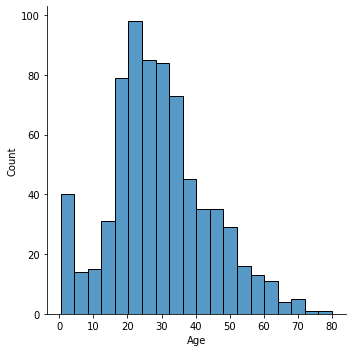

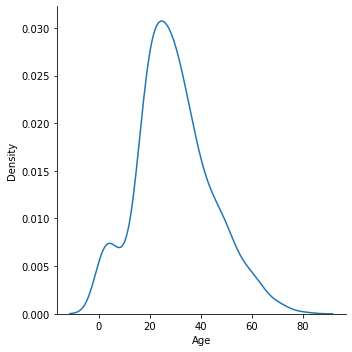

In [73]:
myFirstFunction( Titanic_train_data.Age )


 mean = 29.699117647058824 
 median = 29.69911764705882 
 mode = 29.69911764705882

 shape = (891,) 


 describe 
 count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64 


 histogram 


 kernel density estimates 



(29.699117647058824, 29.69911764705882, 29.69911764705882)

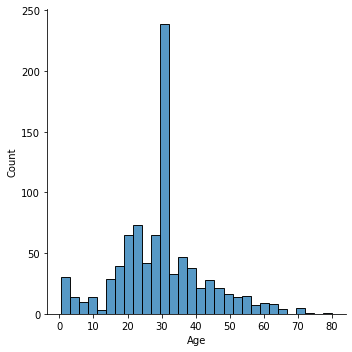

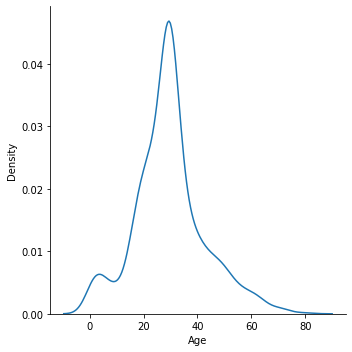

In [74]:
myFirstFunction( imputedTrainingData.Age )


 mean = nan 
 median = nan 
 mode = 24.0

 shape = (891,) 


 describe 
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 


 histogram 


 kernel density estimates 



(nan, nan, 24.0)

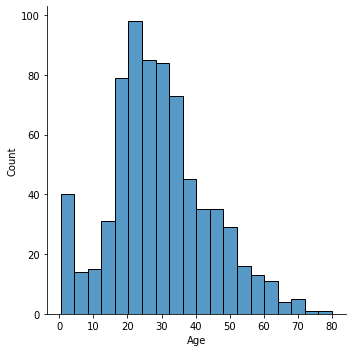

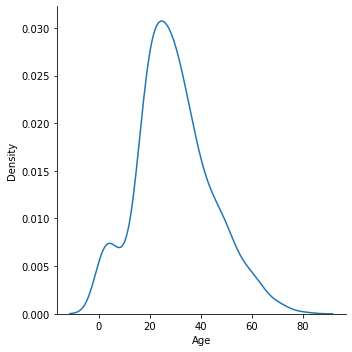

In [75]:
myFirstFunction( Titanic_train_data['Age'] )

**Side note. Question: What is the best method to call a Column/Feature from a DataFrame?**

* Titanic_train_data.Age **or**
* Titanic_train_data['Age']

# Next actions
[top](#Contents)

For my next iterations of the analysis, I want and would like to do the following:  

* I did not focus on Feature Engineering so I am curious how this works in my next project. <br>
* I want to play around Stacking method. This could be implemented in next iterated analysis or on a new project. <br>
* I can enhance the exisiting models by fine tuning their hyperparameters. <br>
    > Hyperparameters are machine learning paramaters in a model that are set/configured BEFORE the model is FITTED onto a training dataset, i.e. `model.fit(X,)`. <br>
        
    > Examples of Hyperparameters: 
    * Learning Rate
    * Number of Epochs
    
        > Note on Parameters of a model: These are for example coefficients and intercept. Here the linear model is y = a + bX, b = coefficient and a = intercept of the linear model. <br>
    
* I chose RandomForestClassifier and LogisticRegression as the basic models. I think RandomForestClassifier is not a basic model because it is an Ensemble model, so I could instead use a KNN Classifier. <br>
    > I would use the KNN Classifier in the next project. <br>
* Beside KNN Classifier model, I also can extend the current selection of models to include Support Vector Machines model as an example. <br>
* I want to play with Autism dataset. A new project. <br>


****

# Relevant links for this analysis
[top](#Contents)

* https://github.com/shafier/Kaggle_Titanic
    * The codes will be made available in the GitHub soon.
 

* Execute the codes on the Colab Google 
    * This will be available soon. 


* Blog on the analysis 
    * This is a working progress. 
    
****